# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data

### Load
- Load the data into pandas dataframes

In [2]:
data_df = pd.read_csv('./data/processed_data.csv')

In [3]:
data_df.head()

,Participant,Age,Native Language,languages_other_english,Gender,Religiosity,Major,major_standardized,College,nigger,...,excrement,semen,breasts,coitus,booty,pee,butt,climax,randy,cunt
0,1,20,"English, Mandarin",1,Male,1.0,"Psychology, Specialized in Clinical Psyc",social_science,Warren,1,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
1,2,18,"English, Chaldean",1,Male,1.0,Visual arts media,arts_humanities,Sixth,1,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1.0
2,3,21,"English, Armenian",1,Male,3.0,Communications,social_science,Roosevelt,3,...,NaN,1.0,1,NaN,1.0,1.0,1,1.0,NaN,1.0
3,4,20,English,0,Male,1.0,Cognitive Science,multi_interdisciplinary,Revelle,9,...,1.0,1.0,1,1.0,1.0,1.0,1,1.0,NaN,1.0
4,5,22,English,0,Male,1.0,ICAM,multi_interdisciplinary,Warren,9,...,1.0,1.0,1,1.0,3.0,1.0,1,1.0,1.0,3.0


In [4]:
data_df.columns

Index(['Participant', 'Age', 'Native Language', 'languages_other_english',
       'Gender', 'Religiosity', 'Major', 'major_standardized', 'College',
       'nigger',
       ...
       'excrement', 'semen', 'breasts', 'coitus', 'booty', 'pee', 'butt',
       'climax', 'randy', 'cunt'],
      dtype='object', length=101)

In [5]:
list(data_df.columns)

['Participant',
 'Age',
 'Native Language',
 'languages_other_english',
 'Gender',
 'Religiosity',
 'Major',
 'major_standardized',
 'College',
 'nigger',
 'fag',
 'cocksucker',
 'chink',
 'motherfucker',
 'buttfuck',
 'bitch',
 'retard',
 'dyke',
 'whore',
 'pussy',
 'slut',
 'homo',
 'fuck',
 'shithead',
 'lesbo',
 'asshole',
 'prick',
 'queer',
 'skank',
 'spic',
 'kike',
 'cock',
 'gook',
 'twat',
 'bastard',
 'loser',
 'goddamn',
 'dick',
 'hooker',
 'nutsack',
 'rimjob',
 'moron',
 'sodomize',
 'dumb',
 'gay',
 'blowjob',
 'clit',
 'tits',
 'shit',
 'dildo',
 'stupid',
 'idiot',
 'bullshit',
 'masturbate',
 'ass',
 'jerk',
 'knockers',
 'castrate',
 'vibrator',
 'turd',
 'anus',
 'jugs',
 'cum',
 'boner',
 'defecate',
 'suck',
 'jism',
 'scrotum',
 'horny',
 'piss',
 'crap',
 'ejaculate',
 'pecker',
 'penis',
 'hump',
 'fellatio',
 'damn',
 'vagina',
 'fornicate',
 'cunnilingus',
 'boobs',
 'hell',
 'nipples',
 'screw',
 'lame',
 'fart',
 'testicles',
 'snatch',
 'balls',
 'orgas

In [6]:
len(list(data_df.columns))

101

In [7]:
categorize_df = pd.read_csv('./data/word_categorization.csv')

In [8]:
categorize_df.head()

,word,religion,sex,body,excretion,slur,insult,formal,closed
0,nigger,0,0,0,0,1,1,0,0
1,fag,0,0,0,0,1,1,0,1
2,cocksucker,0,1,1,0,0,1,0,0
3,chink,0,0,0,0,1,1,0,1
4,motherfucker,0,1,0,0,0,1,0,0


### Examine

- visualize the data

<AxesSubplot: title={'center': 'Age'}>

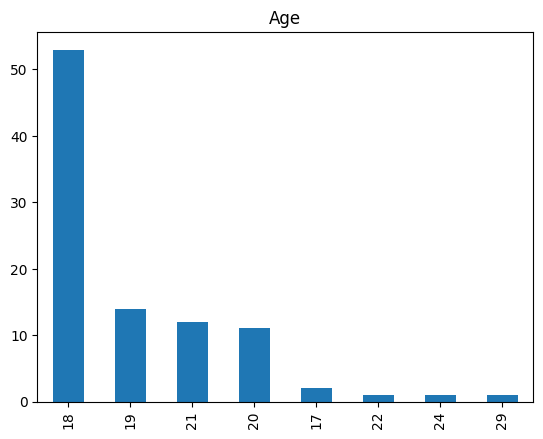

In [9]:
data_df['Age'].value_counts().plot(kind='bar', title='Age')

<AxesSubplot: title={'center': 'Gender'}>

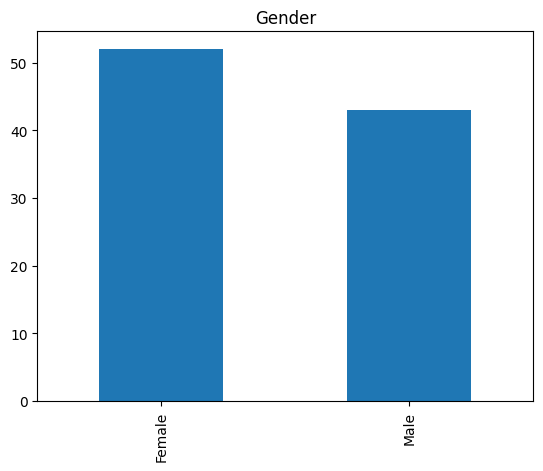

In [10]:
data_df['Gender'].value_counts().plot(kind='bar', title='Gender')

<AxesSubplot: title={'center': 'Major'}>

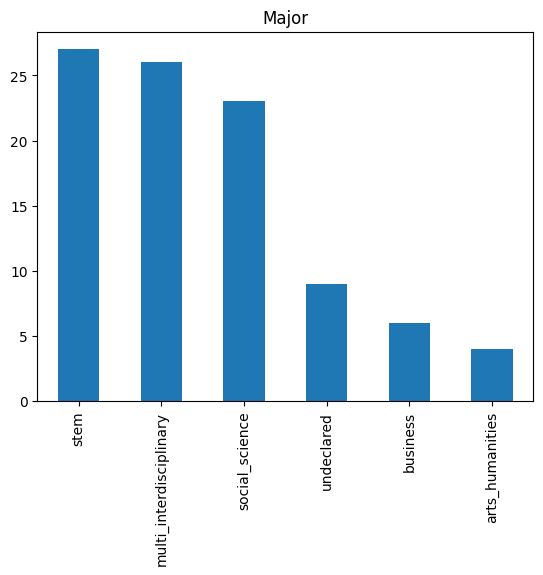

In [11]:
data_df['major_standardized'].value_counts().plot(kind='bar', title='Major')

<AxesSubplot: title={'center': 'Religiosity'}>

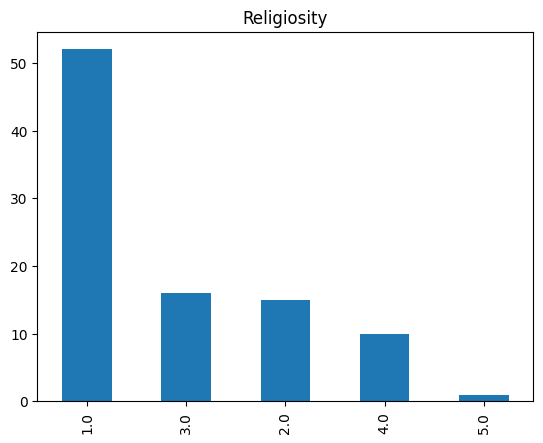

In [12]:
data_df['Religiosity'].value_counts().plot(kind='bar', title='Religiosity')

<AxesSubplot: title={'center': 'College'}>

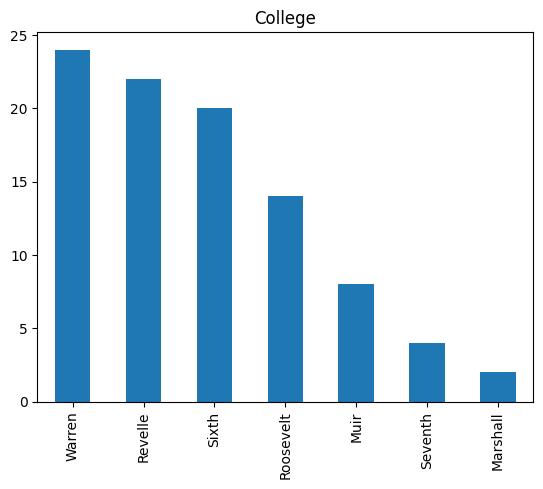

In [13]:
data_df['College'].value_counts().plot(kind='bar', title='College')

<AxesSubplot: title={'center': 'Num. of languages other than English'}>

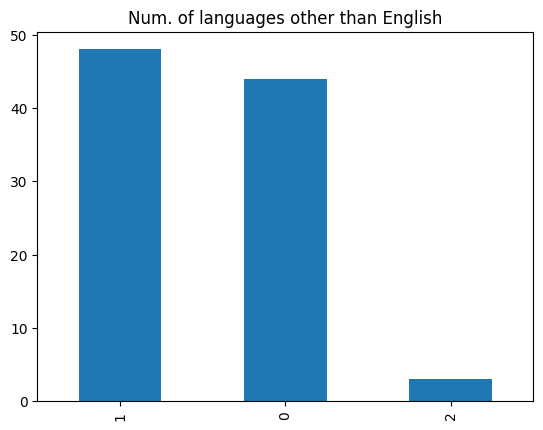

In [14]:
data_df['languages_other_english'].value_counts().plot(kind='bar', title='Num. of languages other than English')

### Reformatting and Feature Creation

- split data into individual words
- join word categorizations
- add syllable count
- add consonant and vowel count and word length

In [15]:
# https://stackoverflow.com/questions/46759492/syllable-count-in-python
# not perfect, but accurate for the profanity selection
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [16]:
# https://stackoverflow.com/questions/19967001/count-vowels-in-string-python
def vowel_count(word):
    num_vowels=0
    for char in word:
        if char.lower() in "aeiou":
           num_vowels += 1
    return num_vowels

In [17]:
def letter_count(words):
    return len(words)

add syllable, consonant, vowel, and letter count to word categorization dataframe

In [18]:
categorize_df['syllables'] = categorize_df['word'].apply(lambda word: syllable_count(word))

In [19]:
categorize_df['vowels'] = categorize_df['word'].apply(lambda word: vowel_count(word))

In [20]:
categorize_df['letters'] = categorize_df['word'].apply(lambda word: letter_count(word))

consonant count is just letter count minus vowel count

In [21]:
categorize_df['consonants'] = categorize_df.apply(lambda row: row['letters'] - row['vowels'], axis=1)

In [22]:
categorize_df.head()

,word,religion,sex,body,excretion,slur,insult,formal,closed,syllables,vowels,letters,consonants
0,nigger,0,0,0,0,1,1,0,0,2,2,6,4
1,fag,0,0,0,0,1,1,0,1,1,1,3,2
2,cocksucker,0,1,1,0,0,1,0,0,3,3,10,7
3,chink,0,0,0,0,1,1,0,1,1,1,5,4
4,motherfucker,0,1,0,0,0,1,0,0,4,4,12,8


format data into a regression or multi-class classification problem where each word is represented with a row with many features

In [23]:
def reformat_data(regression=True):
    formatted_data = []
    data_columns = list(data_df.columns)
    
    output_columns = [
        'participant',
        'age',
        'langs_other_than_eng',
        'gender',
        'religiosity',
        'major',
        'college',
        'word',
        'rating',
    ]
    
    for index, row in data_df.iterrows():
        # grab sample features
        participant = row['Participant']
        age = row['Age']
        langs_other_than_eng = row['languages_other_english']
        gender = row['Gender']
        religiosity = row['Religiosity']
        major = row['major_standardized']
        college = row['College']
        
        # create a sample for each word
        for word_index in range(9, 101):
            word = data_columns[word_index]
            rating_raw = row[word]
            
            # initialize sample without dependent variable
            sample = [
                participant,
                age,
                langs_other_than_eng,
                gender,
                religiosity,
                major,
                college,
                word,
            ]
            
            # add dependent variable label
            if regression is True:
                # ignore empty responses for regression
                if np.isnan(rating_raw):
                    continue
                
                rating = int(rating_raw)
                
                sample.append(rating)
                
                
            else:
                # 1 at index 0 would be no response
                # 1 at index 1 would be rating 1
                # 1 at index 2 would be rating 2
                # ...
                # 1 at index 9 would be rating 9
#                 rating_array = [0] * 10
                
#                 if np.isnan(rating_raw):
#                     rating_array[0] = 1
#                 else:
#                     rating_array[int(rating_raw)] = 1
                
#                 sample.append(rating_array)
                
                rating = 0
                if not np.isnan(rating_raw):
                    rating = int(rating_raw)
                sample.append(rating)
            
            # add sample to final data
            formatted_data.append(sample)   
    
    # convert data to pandas DataFrame
    formatted_data_df = pd.DataFrame(formatted_data, columns=output_columns)
    # join additional features and return
    return pd.merge(formatted_data_df, categorize_df, on='word')
    

### Preprocessing
Initialize Sci-Kit preprocessing pipelines

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [25]:
# impute and standard scale
numerical_fields = ['age', 'langs_other_than_eng', 'religiosity', 'syllables', 'vowels', 'consonants', 'letters']

In [26]:
# one hot encode
one_hot_fields = ['gender', 'major']

In [27]:
# pass through without preprocessing
pass_through_fields = ['sex', 'body', 'excretion', 'slur', 'insult', 'formal', 'closed']

In [28]:
numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('std_scale', StandardScaler())
])

In [29]:
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_fields),
    ('ohe', OneHotEncoder(), one_hot_fields),
    ('pass', 'passthrough', pass_through_fields)
], sparse_threshold=0)

# Statsmodels - Regression
Analysis using Ordinary Least Squares with Statsmodels

In [30]:
regression_data_df = reformat_data()

In [31]:
regression_data_df.head()

,participant,age,langs_other_than_eng,gender,religiosity,major,college,word,rating,religion,...,body,excretion,slur,insult,formal,closed,syllables,vowels,letters,consonants
0,1,20,1,Male,1.0,social_science,Warren,nigger,1,0,...,0,0,1,1,0,0,2,2,6,4
1,2,18,1,Male,1.0,arts_humanities,Sixth,nigger,1,0,...,0,0,1,1,0,0,2,2,6,4
2,3,21,1,Male,3.0,social_science,Roosevelt,nigger,3,0,...,0,0,1,1,0,0,2,2,6,4
3,4,20,0,Male,1.0,multi_interdisciplinary,Revelle,nigger,9,0,...,0,0,1,1,0,0,2,2,6,4
4,5,22,0,Male,1.0,multi_interdisciplinary,Warren,nigger,9,0,...,0,0,1,1,0,0,2,2,6,4


In [32]:
X = regression_data_df.drop(['rating'], axis=1)
y = regression_data_df['rating']

In [33]:
X.shape

(8077, 20)

In [34]:
y.shape

(8077,)

In [35]:
X_processed = full_pipeline.fit_transform(X)

re-convert to pandas dataframe to preserve feature names

In [36]:
X_processed_df = pd.DataFrame(X_processed, columns=full_pipeline.get_feature_names_out())

In [37]:
X_processed_df.head()

,num__age,num__langs_other_than_eng,num__religiosity,num__syllables,num__vowels,num__consonants,num__letters,ohe__gender_Female,ohe__gender_Male,ohe__major_arts_humanities,...,ohe__major_social_science,ohe__major_stem,ohe__major_undeclared,pass__sex,pass__body,pass__excretion,pass__slur,pass__insult,pass__formal,pass__closed
0,0.617979,0.784312,-0.765825,0.403983,0.134541,0.248441,0.233261,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.586368,0.784312,-0.765825,0.403983,0.134541,0.248441,0.233261,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.220153,0.784312,1.054531,0.403983,0.134541,0.248441,0.233261,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.617979,-1.024106,-0.765825,0.403983,0.134541,0.248441,0.233261,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.822326,-1.024106,-0.765825,0.403983,0.134541,0.248441,0.233261,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [38]:
ols_mdl = sm.OLS(y, sm.add_constant(X_processed_df))

In [39]:
ols_mdl_fit = ols_mdl.fit()

In [40]:
ols_mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:50:28   Log-Likelihood:                -15935.
No. Observations:                8077   AIC:                         3.191e+04
Df Residuals:                    8057   BIC:                         3.205e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -8.872e+12   3.74e+12     -2.370      0.018   -1.62e+13   -1.53e+12
num__age                               0.2996      0.021     14.604      0.000       0.259       0.340
num__langs_other_than_eng             -0.1061      0.021     -5.147      0.000      -0.146      -0.066
num__religiosity                       0.1752      0.020      8.703      0.000       0.136       0.215
num__syllables                         0.2206      0.048      4.584      0.000       0.126       0.315
num__vowels                        -2.175e+12   9.18e+11     -2.370      0.018   -3.97e+12   -3.76e+11
num__consonants                    -2.935e+12   1.24e+12     -2.370      0.018   -5.36e+12   -5.08e+11
num__letters                        4.381e+12   1.85e+12      2.370      0.018    7.58e+11       8e+12
ohe__gender_Female                  9.649e+12   4.07e+12      2.370      0.018    1.67e+12    1.76e+13
ohe__gender_Male                    9.649e+12   4.07e+12      2.370      0.018    1.67e+12    1.76e+13
ohe__major_arts_humanities         -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
ohe__major_business                -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
ohe__major_multi_interdisciplinary -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
ohe__major_social_science          -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
ohe__major_stem                    -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
ohe__major_undeclared              -7.772e+11   3.28e+11     -2.370      0.018   -1.42e+12   -1.34e+11
pass__sex                              0.1282      0.055      2.344      0.019       0.021       0.235
pass__body                             0.1979      0.055      3.621      0.000       0.091       0.305
pass__excretion                       -0.0713      0.070     -1.014      0.311      -0.209       0.067
pass__slur                             2.7483      0.066     41.715      0.000       2.619       2.877
pass__insult                           0.7008      0.050     13.894      0.000       0.602       0.800
pass__formal                          -0.4996      0.070     -7.111      0.000      -0.637      -0.362
pass__closed                           0.1361      0.055      2.477      0.013       0.028       0.244
==============================================================================
Omnibus:                     1058.265   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1734.656
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       4.382   Cond. No.                     1.27e+16
==========

In [41]:
ols_mdl_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                 Results: Ordinary least squares
=================================================================================================================================
Model:                                    OLS                                  Adj. R-squared:                         0.330     
Dependent Variable:                       rating                               AIC:                                    31909.1946
Date:                                     2022-11-20 16:50                     BIC:                                    32049.1301
No. Observations:                         8077                                 Log-Likelihood:                         -15935.   
Df Model:                                 19                                   F-statistic:                            210.8     
Df Residuals:                             8057                                 Prob (F-statistic):                     0.00      
R-squared:                                0.332                                Scale:                                  3.0352    
---------------------------------------------------------------------------------------------------------------------------------
                                          Coef.             Std.Err.         t    P>|t|         [0.025               0.975]      
---------------------------------------------------------------------------------------------------------------------------------
const                              -8871567333259.2910 3742851013868.4717 -2.3703 0.0178 -16208522712954.0859 -1534611953564.4971
num__age                                        0.2996             0.0205 14.6041 0.0000               0.2594              0.3398
num__langs_other_than_eng                      -0.1061             0.0206 -5.1469 0.0000              -0.1465             -0.0657
num__religiosity                                0.1752             0.0201  8.7034 0.0000               0.1357              0.2147
num__syllables                                  0.2206             0.0481  4.5844 0.0000               0.1263              0.3150
num__vowels                        -2174820286480.5530  917541174907.9905 -2.3703 0.0178  -3973438140728.1792  -376202432232.9268
num__consonants                    -2935285124141.8765 1238375868680.9817 -2.3703 0.0178  -5362821902425.8418  -507748345857.9111
num__letters                        4380702050629.3945 1848186965811.8384  2.3703 0.0178    757777907709.8540  8003626193548.9355
ohe__gender_Female                  9648735407437.2617 4070732684052.2178  2.3703 0.0178   1669047208550.8330 17628423606323.6914
ohe__gender_Male                    9648735407436.9102 4070732684052.2202  2.3703 0.0178   1669047208550.4766 17628423606323.3438
ohe__major_arts_humanities          -777168074176.4434  327881670183.7262 -2.3703 0.0178  -1419900893368.0388  -134435254984.8479
ohe__major_business                 -777168074176.1769  327881670183.7274 -2.3703 0.0178  -1419900893367.7749  -134435254984.5790
ohe__major_multi_interdisciplinary  -777168074176.0605  327881670183.7266 -2.3703 0.0178  -1419900893367.6567  -134435254984.4642
ohe__major_social_science           -777168074176.3192  327881670183.7253 -2.3703 0.0178  -1419900893367.9128  -134435254984.7256
ohe__major_stem                     -777168074176.0939  327881670183.7258 -2.3703 0.0178  -1419900893367.6885  -134435254984.4993
ohe__major_undeclared               -777168074175.3820  327881670183.7251 -2.3703 0.0178  -1419900893366.9751  -134435254983.7887
pass__sex                                       0.1282             0.0547  2.3440 0.0191               0.0210              0.2354
pass__body                                      0.1979             0.0547  3.6208 0.0003               0.0908              0.3050
pass__excretion                                -0.0713             0.0703 -1.0139 0.3107            

# Sci-Kit Models - Classification

### Create Training and Test Sets

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [148]:
classification_df = reformat_data(regression=False)

In [149]:
classification_df.head()

,participant,age,langs_other_than_eng,gender,religiosity,major,college,word,rating,religion,...,body,excretion,slur,insult,formal,closed,syllables,vowels,letters,consonants
0,1,20,1,Male,1.0,social_science,Warren,nigger,1,0,...,0,0,1,1,0,0,2,2,6,4
1,2,18,1,Male,1.0,arts_humanities,Sixth,nigger,1,0,...,0,0,1,1,0,0,2,2,6,4
2,3,21,1,Male,3.0,social_science,Roosevelt,nigger,3,0,...,0,0,1,1,0,0,2,2,6,4
3,4,20,0,Male,1.0,multi_interdisciplinary,Revelle,nigger,9,0,...,0,0,1,1,0,0,2,2,6,4
4,5,22,0,Male,1.0,multi_interdisciplinary,Warren,nigger,9,0,...,0,0,1,1,0,0,2,2,6,4


In [150]:
label_columns = [
    'no response',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
]

In [151]:
X = classification_df.drop(['rating'], axis=1)
# y = pd.DataFrame(classification_df['rating'].to_list(), columns=label_columns)
# y = MultiLabelBinarizer().fit_transform(classification_df['rating'])
y = classification_df['rating']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [153]:
X_train.to_csv('example_data.csv')

In [154]:
X_train.shape

(6992, 20)

In [155]:
y_train.shape

(6992,)

In [156]:
y_train

8055    1
7674    2
2929    1
1631    1
3279    3
       ..
3195    1
7060    2
1088    8
7209    3
8297    1
Name: rating, Length: 6992, dtype: int64

In [157]:
X_train_processed = full_pipeline.fit_transform(X_train)

In [158]:
X_test_processed = full_pipeline.transform(X_test)

In [159]:
def cross_validation_report(model):
    scores = cross_val_score(
        model, 
        X_train_processed, y_train,
        scoring=make_scorer(f1_score, average='weighted'), 
        # scoring='accuracy',
        # scoring='neg_mean_squared_error',
        cv=10
    )
    print('Avg:', scores.mean())
    print('Std:', scores.std())
    print('Scores:', scores)

In [160]:
def training_confusion_matrix(model):
    model.fit(X_train_processed, y_train)
    conf_matrix = confusion_matrix(y_train, model.predict(X_train_processed))
    return ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [57]:
log_reg = LogisticRegression(multi_class='ovr')

In [58]:
cross_validation_report(log_reg)

Avg: 0.3821523726807026
Std: 0.01340110034742363
Scores: [0.37272215 0.37835573 0.39491077 0.3879091  0.37099586 0.41051564
 0.36951397 0.3944018  0.37370469 0.36849401]


In [59]:
log_reg.fit(X_train_processed, y_train)

LogisticRegression(multi_class='ovr')

In [60]:
conf_matrix = confusion_matrix(y_train, log_reg.predict(X_train_processed))

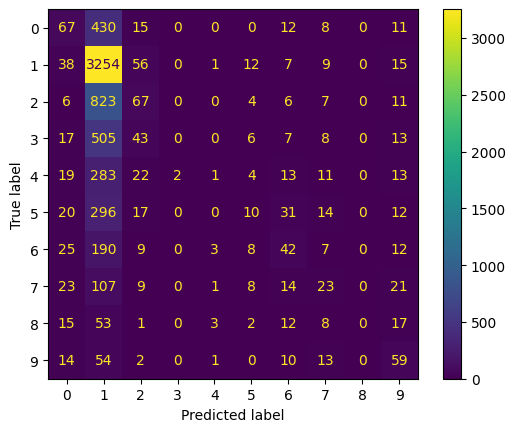

In [61]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier()

In [64]:
cross_validation_report(forest_clf)

Avg: 0.4516267325665454
Std: 0.011197636043009947
Scores: [0.44547773 0.44609925 0.46510942 0.45642526 0.44330146 0.46991745
 0.45084429 0.43232273 0.46331963 0.4434501 ]


In [65]:
forest_clf.fit(X_train_processed, y_train)

RandomForestClassifier()

In [66]:
conf_m = confusion_matrix(y_test, forest_clf.predict(X_test_processed))

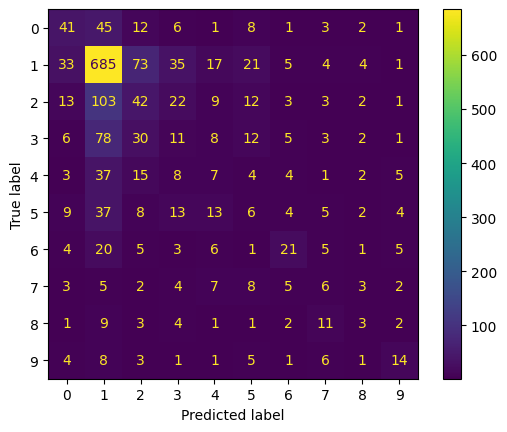

In [67]:
ConfusionMatrixDisplay(confusion_matrix=conf_m).plot()

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, forest_clf.predict(X_test_processed))

0.4782608695652174

In [70]:
f1_score(y_test, forest_clf.predict(X_test_processed), average='weighted')

0.4540769449703033

### K Nearest Neighbors

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn_clf = KNeighborsClassifier()

In [73]:
cross_validation_report(knn_clf)

Avg: 0.4249481705306616
Std: 0.010264522076119248
Scores: [0.42631913 0.42457347 0.43724673 0.43058285 0.42666157 0.4406977
 0.41762093 0.40171823 0.42393491 0.42012619]


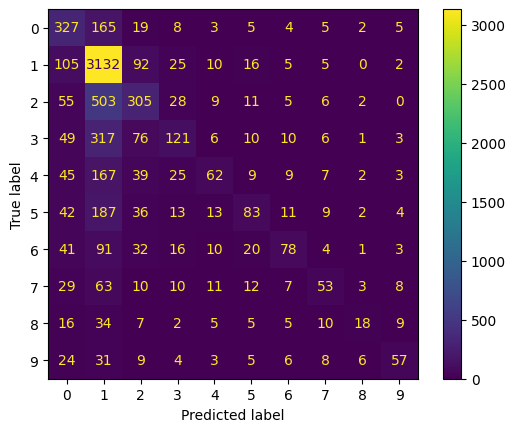

In [74]:
training_confusion_matrix(knn_clf)

In [163]:
knn_clf.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [164]:
conf_m = confusion_matrix(y_test, knn_clf.predict(X_test_processed))

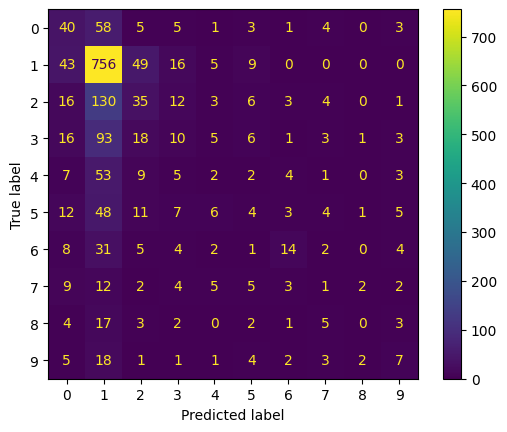

In [165]:
ConfusionMatrixDisplay(confusion_matrix=conf_m).plot()

In [76]:
accuracy_score(y_test, knn_clf.predict(X_test_processed))

0.4971395881006865

In [77]:
f1_score(y_test, knn_clf.predict(X_test_processed), average='weighted')

0.4358882525479593

### Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb_clf = GaussianNB()

In [80]:
cross_validation_report(nb_clf)

Avg: 0.3522215609757104
Std: 0.01888237590452247
Scores: [0.36884405 0.3594828  0.36809839 0.35750941 0.352612   0.36741644
 0.3577138  0.34942225 0.30208929 0.33902718]


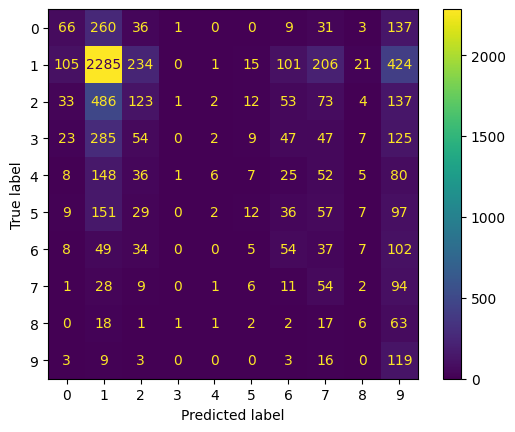

In [81]:
training_confusion_matrix(nb_clf)

### SVM

In [82]:
from sklearn.svm import SVC

In [83]:
svm_clf = SVC()

In [84]:
cross_validation_report(svm_clf)

Avg: 0.40384853275165006
Std: 0.010371626286693704
Scores: [0.40214614 0.4055408  0.40739131 0.40207076 0.40367617 0.43113757
 0.39298184 0.40140982 0.3903942  0.40173671]


In [85]:
# training_confusion_matrix(svm_clf)

# Sci-Kit Models - Regression

#### Create Training and Testing Sets

In [86]:
sk_regression = reformat_data()

In [87]:
X = sk_regression.drop(['rating'], axis=1)
y = sk_regression['rating']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [89]:
X_train.shape

(6461, 20)

In [90]:
y_train.shape

(6461,)

In [91]:
X_train_processed = full_pipeline.fit_transform(X_train)

In [92]:
X_test_processed = full_pipeline.transform(X_test)

In [93]:
def mse_cross_validation(model):
    scores = cross_val_score(
        model, 
        X_train_processed, y_train,
        scoring='neg_mean_squared_error',
        cv=10
    )
    scores = np.sqrt(-scores)
    print('Avg:', scores.mean())
    print('Std:', scores.std())
    print('Scores:', scores)

### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lin_reg = LinearRegression()

In [96]:
mse_cross_validation(lin_reg)

Avg: 1.7420640771517668
Std: 0.05764527484894489
Scores: [1.75629189 1.68134407 1.79595367 1.86765397 1.69633883 1.68121814
 1.68530007 1.76678885 1.76747226 1.72227901]


### Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
forest_reg = RandomForestRegressor()

In [99]:
mse_cross_validation(forest_reg)

Avg: 1.6197265799260094
Std: 0.05553736487550725
Scores: [1.68973281 1.60609317 1.62083152 1.70498801 1.5830967  1.54221326
 1.58321364 1.62542259 1.69072391 1.55095019]


### K Nearest Neighbors

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knn_reg = KNeighborsRegressor()

In [102]:
mse_cross_validation(knn_reg)

Avg: 1.724763632444564
Std: 0.05674836247118555
Scores: [1.80178514 1.69216003 1.74602601 1.82363228 1.71808807 1.6786955
 1.68385155 1.76208784 1.71476921 1.62654071]


### Support Vector Machine

In [103]:
from sklearn.svm import SVR

In [104]:
svm_reg = SVR()

In [105]:
# takes a while
mse_cross_validation(svm_reg)

Avg: 1.6628076285597966
Std: 0.0901884851624646
Scores: [1.6975777  1.55661779 1.70199997 1.8516572  1.58206323 1.61818542
 1.56208191 1.72633844 1.73265002 1.59890461]


### Hypertuning - Random Forest

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = [{
    'n_estimators': [170],
}]

In [108]:
model = RandomForestRegressor(random_state=39)

In [109]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=5)

In [110]:
# grid_search.fit(X_train_processed, y_train)

In [111]:
# grid_search.best_params_
# n_estimators: 170

In [112]:
final_model = RandomForestRegressor(n_estimators=170)

In [113]:
final_model.fit(X_train_processed, y_train)

RandomForestRegressor(n_estimators=170)

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
np.amax(final_model.predict(X_test_processed))

8.782352941176471

In [116]:
np.amin(final_model.predict(X_test_processed))

1.0

In [117]:
mean_squared_error(y_test, final_model.predict(X_test_processed), squared=False)

1.6623192683455539

In [118]:
r2_score(y_test, final_model.predict(X_test_processed))

0.3772841612110043

In [119]:
def sample_prediction(index, model):
    truth = y_test.values[index]
    prediction = model.predict(X_test_processed[index:index+1])
    print('Pred:', prediction)
    print('Truth:', truth)

In [120]:
for i in range(70, 90):
    sample_prediction(i, final_model)

Pred: [3.62588235]
Truth: 1
Pred: [1.24696078]
Truth: 1
Pred: [1.0238212]
Truth: 1
Pred: [3.49607843]
Truth: 3
Pred: [3.51382353]
Truth: 7
Pred: [5.69186275]
Truth: 5
Pred: [3.57607843]
Truth: 3
Pred: [3.17352941]
Truth: 2
Pred: [1.17029412]
Truth: 1
Pred: [6.]
Truth: 6
Pred: [1.66176471]
Truth: 1
Pred: [4.94127451]
Truth: 9
Pred: [3.20558824]
Truth: 2
Pred: [5.33333333]
Truth: 3
Pred: [1.97988796]
Truth: 2
Pred: [1.25337111]
Truth: 1
Pred: [2.63310924]
Truth: 2
Pred: [2.2627591]
Truth: 1
Pred: [1.37078198]
Truth: 2
Pred: [1.0535014]
Truth: 1


In [121]:
conf_m = confusion_matrix(y_test, np.rint(final_model.predict(X_test_processed)))

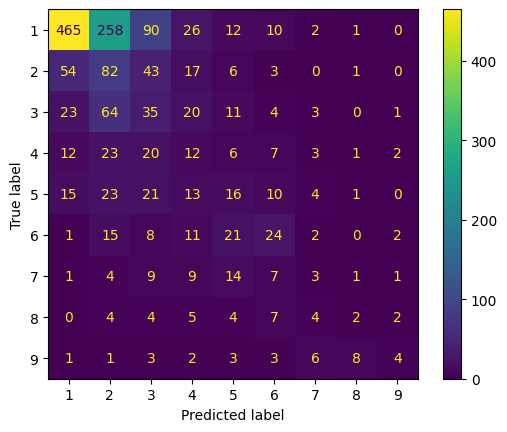

In [122]:
ConfusionMatrixDisplay(conf_m, display_labels=[1,2,3,4,5,6,7,8,9]).plot()

In [123]:
accuracy_score(y_test, np.rint(final_model.predict(X_test_processed)))

0.3978960396039604

### Hypertuning - KNN

In [124]:
param_grid = [{
    'n_neighbors': [20],
    'leaf_size': [1, 2, 3],
    'p': [1],
}]

In [125]:
model = KNeighborsRegressor()

In [126]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=5)

In [127]:
# grid_search.fit(X_train_processed, y_train)

In [128]:
# grid_search.best_params_
# leaf_size: 1
# n_neighbors: 20
# p: 1

In [129]:
final_model = KNeighborsRegressor(leaf_size=1, n_neighbors=20, p=1)

In [130]:
final_model.fit(X_train_processed, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=20, p=1)

In [131]:
np.amax(final_model.predict(X_test_processed))

7.45

In [132]:
np.amin(final_model.predict(X_test_processed))

1.0

In [133]:
mean_squared_error(y_test, final_model.predict(X_test_processed), squared=False)

1.638623395922128

In [134]:
r2_score(y_test, final_model.predict(X_test_processed))

0.3949108898314445

In [135]:
for i in range(90, 120):
    sample_prediction(i, final_model)

Pred: [4.55]
Truth: 6
Pred: [2.15]
Truth: 1
Pred: [1.9]
Truth: 1
Pred: [2.25]
Truth: 2
Pred: [3.95]
Truth: 1
Pred: [3.3]
Truth: 1
Pred: [2.]
Truth: 2
Pred: [1.6]
Truth: 1
Pred: [3.75]
Truth: 1
Pred: [2.3]
Truth: 6
Pred: [2.9]
Truth: 2
Pred: [1.45]
Truth: 1
Pred: [2.]
Truth: 2
Pred: [1.6]
Truth: 3
Pred: [1.05]
Truth: 1
Pred: [2.75]
Truth: 2
Pred: [4.75]
Truth: 4
Pred: [2.15]
Truth: 5
Pred: [3.25]
Truth: 1
Pred: [1.6]
Truth: 1
Pred: [2.15]
Truth: 7
Pred: [1.65]
Truth: 1
Pred: [5.2]
Truth: 7
Pred: [1.4]
Truth: 1
Pred: [2.9]
Truth: 1
Pred: [1.65]
Truth: 1
Pred: [1.6]
Truth: 1
Pred: [3.15]
Truth: 1
Pred: [1.4]
Truth: 1
Pred: [1.]
Truth: 1


In [136]:
conf_m = confusion_matrix(y_test, np.rint(final_model.predict(X_test_processed)))

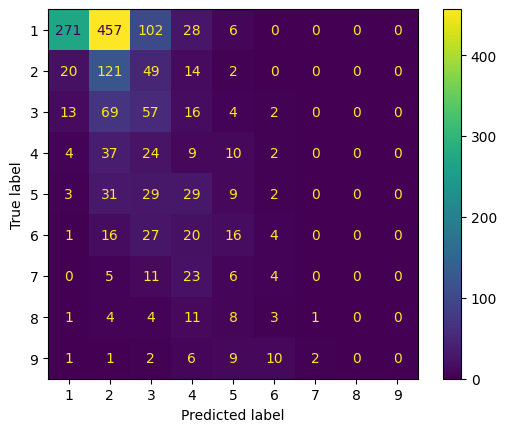

In [137]:
ConfusionMatrixDisplay(conf_m, display_labels=[1,2,3,4,5,6,7,8,9]).plot()

In [138]:
accuracy_score(y_test, np.rint(final_model.predict(X_test_processed)))

0.29146039603960394

### Rating Distribution

<AxesSubplot: title={'center': 'Ratings'}>

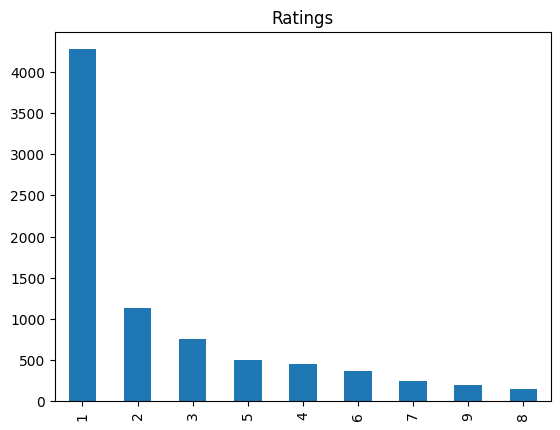

In [139]:
y.value_counts().plot(kind='bar', title='Ratings')

### Comparison to 1 only predictor

In [140]:
y_pred_1 = y_test.copy()

In [141]:
y_pred_1.iloc[:] = 1

In [142]:
y_pred_1

2566    1
676     1
5838    1
1749    1
6516    1
       ..
2981    1
1468    1
3091    1
46      1
2790    1
Name: rating, Length: 1616, dtype: int64

In [143]:
y_test

2566    1
676     5
5838    3
1749    6
6516    1
       ..
2981    1
1468    7
3091    4
46      8
2790    1
Name: rating, Length: 1616, dtype: int64

In [144]:
mean_squared_error(y_test, y_pred_1, squared=False)

2.5717428693667284

In [145]:
r2_score(y_test, y_pred_1)

-0.49044557845671255

In [146]:
accuracy_score(y_test, y_pred_1)

0.5346534653465347

### Conclusion

Not too unreliable